In [40]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

dataset = pd.read_csv(r'C:\Users\rosti\Downloads\breast+cancer+wisconsin+original\breast-cancer-wisconsin.data')
dataset.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
clean_dataset = dataset.dropna()

for x in clean_dataset.index:
    if clean_dataset.loc[x, 'Bare Nuclei']=='?':
        clean_dataset.drop(x, inplace = True)

clean_dataset = clean_dataset.astype({'Bare Nuclei':'int64', 'Sample code number':'category'})

clean_dataset = clean_dataset.drop(['Sample code number'], axis = 1) 

X = clean_dataset.drop(['Class'], axis = 1) # вибірка ознак
y = clean_dataset['Class'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #розподіл тренувальної та тестувальної вибірок

model = DecisionTreeClassifier(criterion='gini') #класифікатор дерев рішень
model.fit(X_train, y_train) #тренування
y_pred = model.predict(X_test) #передбачення

print(classification_report(y_test, y_pred)) #звіт з основними метриками класифікації

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        94
           4       0.91      0.91      0.91        43

    accuracy                           0.94       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.94      0.94      0.94       137



In [41]:
print(confusion_matrix(y_test, y_pred)) #матриця невідповідностей

[[90  4]
 [ 4 39]]


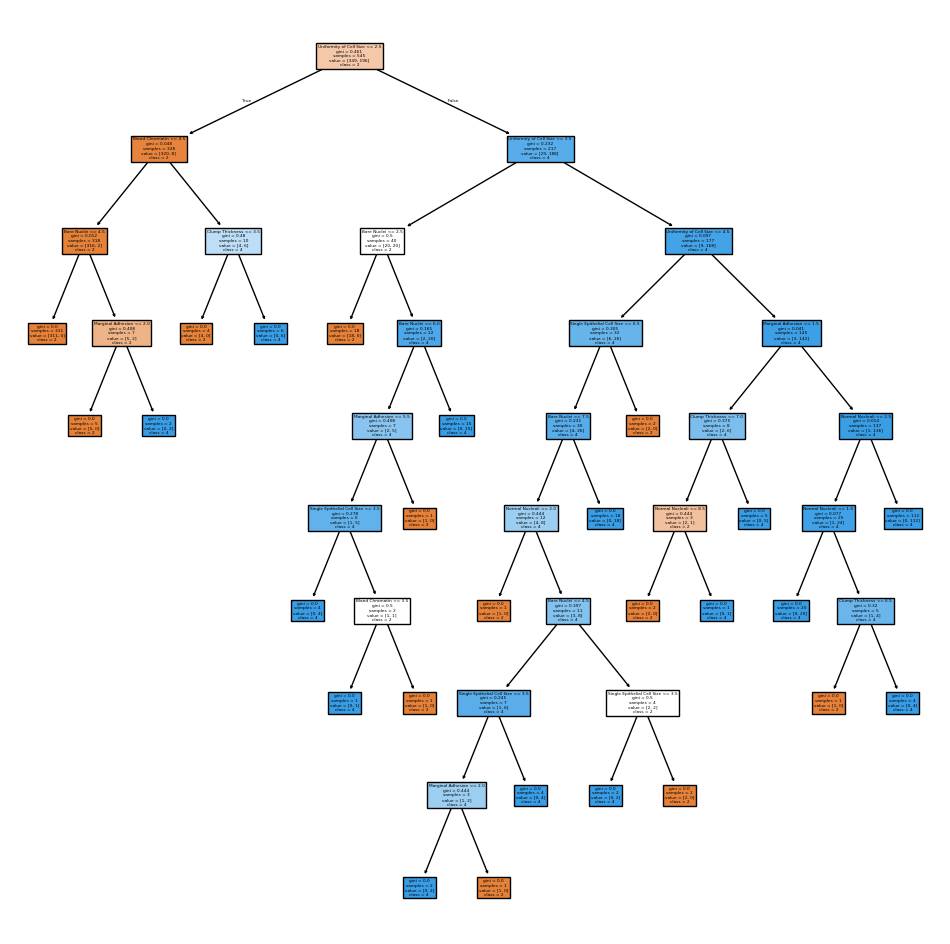

In [42]:
plt.figure(figsize = (12, 12))
plot_tree(model, feature_names = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'], class_names=['2','4'], filled = True)
plt.savefig('clf_5trees.png')
plt.show() # виведення моделі дерева рішень